# The questions:

* **What's the sales trend?**
* **What's the most preferred shipment method?**
* **What's profitability of each category?**



___

## Installing/importing needed libraries:

In [1]:
pip install openpyxl

     |████████████████████████████████| 243 kB 1.3 MB/s 
  Created wheel for et-xmlfile: filename=et_xmlfile-1.0.1-py3-none-any.whl size=8913 sha256=ac57a3cd946229683432fb36b5a8eed89f47744558e8734749fe9d36920af4e1
  Stored in directory: /root/.cache/pip/wheels/e2/bd/55/048b4fd505716c4c298f42ee02dffd9496bb6d212b266c7f31
Successfully built et-xmlfile
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Importing the sheets we will work on: 

In [3]:
orders = pd.read_excel('../input/sales-sheet/superstore_sales.xlsx', sheet_name='Orders', engine='openpyxl')
orders.head(2)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011


In [4]:
people = pd.read_excel('../input/sales-sheet/superstore_sales.xlsx', sheet_name='People', engine='openpyxl')
people

,Person,Region
0,Anna Andreadi,Central
1,Chuck Magee,South
2,Kelly Williams,East
3,Matt Collister,West
4,Deborah Brumfield,Africa
5,Larry Hughes,AMEA
6,Nicole Hansen,Canada
7,Giulietta Dortch,Caribbean
8,Nora Preis,Central Asia
9,Jack Lebron,North


In [5]:
returns = pd.read_excel('../input/sales-sheet/superstore_sales.xlsx', sheet_name='Returns', engine='openpyxl')
returns.head(10)

,Returned,Order ID,Market
0,Yes,MX-2013-168137,LATAM
1,Yes,US-2011-165316,LATAM
2,Yes,ES-2013-1525878,EU
3,Yes,CA-2013-118311,United States
4,Yes,ES-2011-1276768,EU
5,Yes,MX-2013-131247,LATAM
6,Yes,ID-2011-20975,APAC
7,Yes,IN-2014-58460,APAC
8,Yes,ES-2011-3028321,EU
9,Yes,MX-2014-148285,LATAM


In the returns sheet, there're: 
 LATAM            297
APAC             296
United States    296
EU               284
Name: Market, dtype: int64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


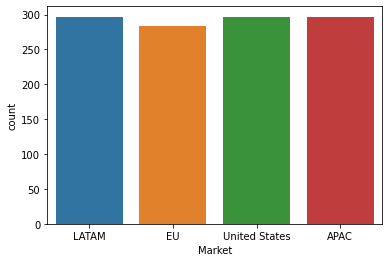

In [6]:
print('In the returns sheet, there\'re: \n', returns.Market.value_counts())
sns.countplot(returns['Market'])
plt.show()

In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [8]:
orders.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [9]:
data = orders[['order_id', 'order_date', 'ship_date', 'ship_mode', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'profit']]

In [10]:
data.index = np.arange(1, len(data) +1)

In [11]:
data[:2]

,order_id,order_date,ship_date,ship_mode,product_id,category,sub_category,product_name,sales,quantity,profit
1,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,106.140
2,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,36.036


<h2> What's the sales trend?

In [12]:
print('The first date:\n', data['order_date'].min()) 
print('The last date:\n', data['order_date'].max()) 

The first date:
 2011-01-01 00:00:00
The last date:
 2014-12-31 00:00:00


In [13]:
data['month_year'] = data['order_date'].apply(lambda x: x.strftime ('%y-%m'))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
data[:3]

,order_id,order_date,ship_date,ship_mode,product_id,category,sub_category,product_name,sales,quantity,profit,month_year
1,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,106.140,11-01
2,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,36.036,11-01
3,HU-2011-1220,2011-01-01,2011-01-05,Second Class,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,29.640,11-01


In [15]:
sales_per_month = data.groupby('month_year').sum()['sales'].reset_index()
sales_per_month[:3]

,month_year,sales
0,11-01,98898.48886
1,11-02,91152.15698
2,11-03,145729.36736


In [16]:
sales_per_month['sales'] = sales_per_month['sales'].astype(int)
sales_per_month[:3]

,month_year,sales
0,11-01,98898
1,11-02,91152
2,11-03,145729


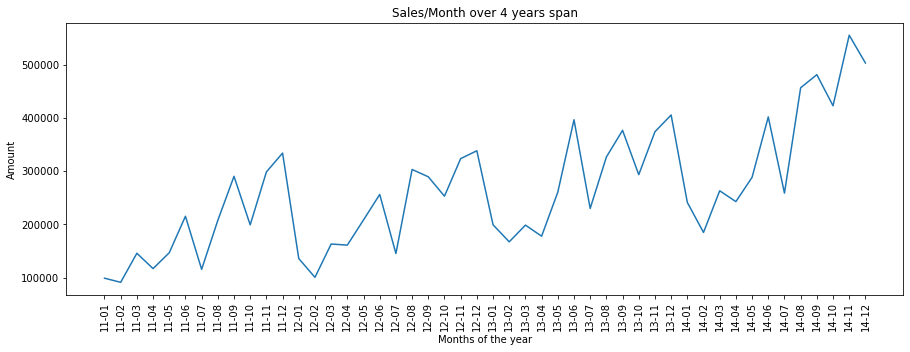

In [17]:
plt.figure(figsize=(15,5))
plt.plot(sales_per_month['month_year'], sales_per_month['sales'])
plt.xticks(rotation='vertical', )
plt.xlabel('Months of the year')
plt.ylabel('Amount')
plt.title('Sales/Month over 4 years span')

plt.show()

## What's the most preferred shipment method?

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


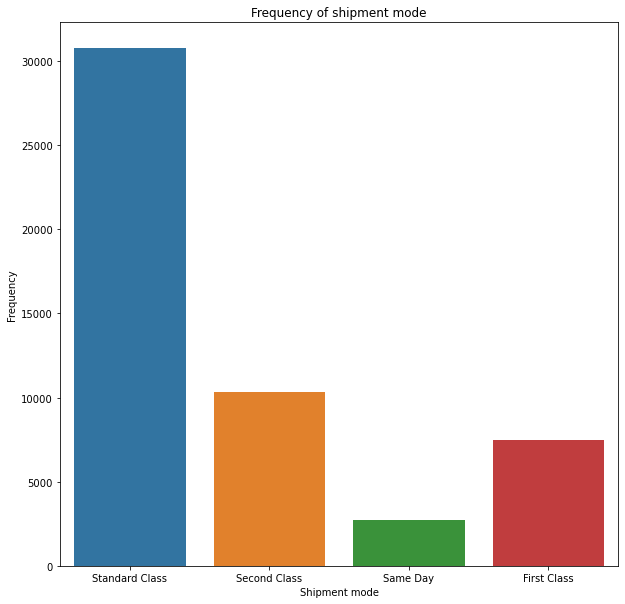

In [18]:
plt.figure(figsize=(10,10))
sns.countplot(data['ship_mode'])
plt.xlabel('Shipment mode')
plt.ylabel('Frequency')
plt.title('Frequency of shipment mode')
plt.show()

## What are the most profitable category?

In [19]:
profit_per_category = pd.DataFrame(data.groupby(['category', 'sub_category']).sum()['profit'])

In [20]:
profit_per_category.sort_values(['category', 'profit'], ascending=False)

profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
                Accessories   129626.30620
                Machines       58867.87300
Office Supplies Appliances    141680.58940
                Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
                Art            57953.91090
                Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870

In [21]:
profit_sum = data['profit'].sum()
profit_sum

1469034.8212799998

In [22]:
profit_per_category['percentage'] = profit_per_category['profit'].apply(lambda x: x/profit_sum*100)
profit_per_category['percentage'] = profit_per_category['percentage'].round(decimals=1)

In [23]:
profit_per_category

profit  percentage
category        sub_category                          
Furniture       Bookcases     161924.41950        11.0
                Chairs        141973.79750         9.7
                Furnishings    46967.42550         3.2
                Tables        -64083.38870        -4.4
Office Supplies Appliances    141680.58940         9.6
                Art            57953.91090         3.9
                Binders        72449.84600         4.9
                Envelopes      29601.11630         2.0
                Fasteners      11525.42410         0.8
                Labels         15010.51200         1.0
                Paper          59207.68270         4.0
                Storage       108461.48980         7.4
                Supplies       22583.26310         1.5
Technology      Accessories   129626.30620         8.8
                Copiers       258567.54818        17.6
                Machines       58867.87300         4.0
                Phones        216717.00580        14.8

In [24]:
largest = profit_per_category.nlargest(5,'percentage')
largest

profit  percentage
category        sub_category                          
Technology      Copiers       258567.54818        17.6
                Phones        216717.00580        14.8
Furniture       Bookcases     161924.41950        11.0
                Chairs        141973.79750         9.7
Office Supplies Appliances    141680.58940         9.6

In [25]:
print('Largest profitable products:\n', largest['percentage'].tolist())

Largest profitable products:
 [17.6, 14.8, 11.0, 9.7, 9.6]


In [26]:
profit_per_category_reset = profit_per_category.reset_index()

In [27]:
profit_per_category_reset = profit_per_category_reset.groupby('category').sum()[['profit', 'percentage']]
ppc = profit_per_category_reset.reset_index()
ppc

,category,profit,percentage
0,Furniture,286782.25380,19.5
1,Office Supplies,518473.83430,35.1
2,Technology,663778.73318,45.2


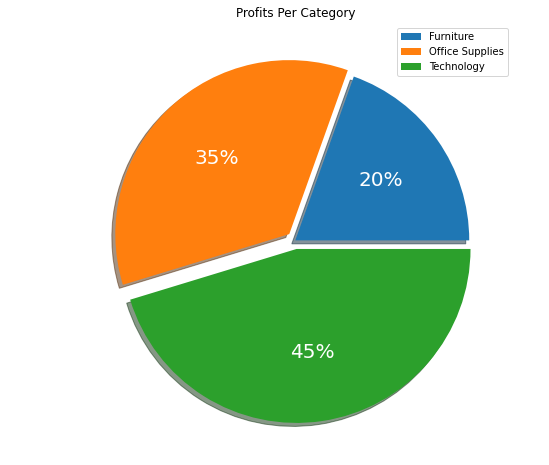

In [28]:
plt.figure(figsize=(11,8))

plt.pie(ppc['percentage'], 
        labels=ppc['category'], 
        shadow=True,
        explode=(0,.05,.05),
        textprops=dict(color='w', fontsize=20),
        autopct='%1.0f%%')

plt.title('Profits Per Category')
plt.legend(loc='upper right') 
plt.show() 